### One-way ANOVA

In [3]:
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import statsmodels.api as sm
import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
try:
    rehab_table = pd.read_csv('rehab.table')
except:
    url = 'http://stats191.stanford.edu/data/rehab.csv'
    rehab_table = pd.read_table(url, delimiter=",")
    rehab_table.to_csv('rehab.table')

In [5]:
rehab_table.head()

,Fitness,Time
0,1,29
1,1,42
2,1,38
3,1,40
4,1,43


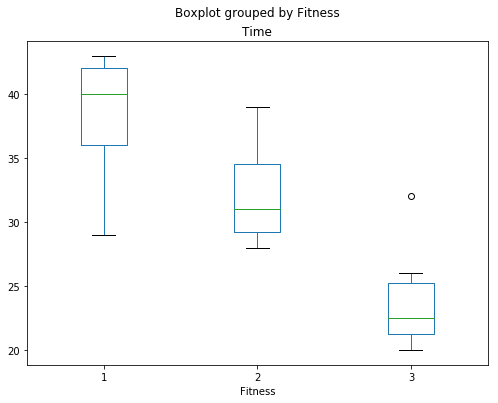

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
fig = rehab_table.boxplot('Time', 'Fitness', ax=ax, grid=False)

In [7]:
rehab_lm = ols('Time ~ C(Fitness)', data=rehab_table).fit()
table9 = anova_lm(rehab_lm)
print(table9)

              df  sum_sq     mean_sq          F    PR(>F)
C(Fitness)   2.0   672.0  336.000000  16.961538  0.000041
Residual    21.0   416.0   19.809524        NaN       NaN


In [8]:
print(rehab_lm.model.data.orig_exog)

    Intercept  C(Fitness)[T.2]  C(Fitness)[T.3]
0         1.0              0.0              0.0
1         1.0              0.0              0.0
2         1.0              0.0              0.0
3         1.0              0.0              0.0
4         1.0              0.0              0.0
5         1.0              0.0              0.0
6         1.0              0.0              0.0
7         1.0              0.0              0.0
8         1.0              1.0              0.0
9         1.0              1.0              0.0
10        1.0              1.0              0.0
11        1.0              1.0              0.0
12        1.0              1.0              0.0
13        1.0              1.0              0.0
14        1.0              1.0              0.0
15        1.0              1.0              0.0
16        1.0              1.0              0.0
17        1.0              1.0              0.0
18        1.0              0.0              1.0
19        1.0              0.0          

In [9]:
print(rehab_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     16.96
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           4.13e-05
Time:                        10:30:04   Log-Likelihood:                -68.286
No. Observations:                  24   AIC:                             142.6
Df Residuals:                      21   BIC:                             146.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.0000      1.574     

### Two-way ANOVA

In [10]:
# do not use this block
try:
    kidney_table = pd.read_table('kidney.table')
except:
    url = 'http://stats191.stanford.edu/data/kidney.table'
    kidney_table = pd.read_csv(url, delim_whitespace=True)

In [15]:
# kidney_table = pd.read_table('kidney.table')
kidney_table = pd.read_csv('kidney.table', delim_whitespace=True)

In [19]:
kidney_table.head(60)

,Days,Duration,Weight,ID
0,0.0,1,1,1
1,2.0,1,1,2
2,1.0,1,1,3
3,3.0,1,1,4
4,0.0,1,1,5
5,2.0,1,1,6
6,0.0,1,1,7
7,5.0,1,1,8
8,6.0,1,1,9
9,8.0,1,1,10


In [18]:
kidney_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Days        60 non-null float64
Duration    60 non-null int64
Weight      60 non-null int64
ID          60 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0 KB


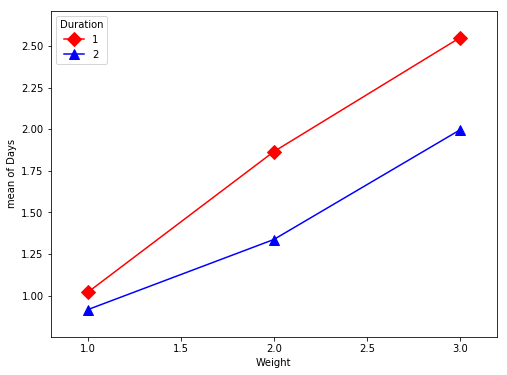

In [17]:
# weight : 1, 2, 3 ; for duration : 1, 2 ; then you calculate the mean of days in 'groups' or mean of days...
kt = kidney_table
plt.figure(figsize=(8,6))
fig = interaction_plot(kt['Weight'], kt['Duration'], np.log(kt['Days']+1),
        colors=['red', 'blue'], markers=['D','^'], ms=10, ax=plt.gca())

In [ ]:
# You have things available in the calling namespace available in the formula evaluation namespace

In [22]:
kidney_lm = ols('np.log(Days+1) ~ C(Duration) * C(Weight)', data=kt).fit()

table10 = anova_lm(kidney_lm)

print(anova_lm(ols('np.log(Days+1) ~ C(Duration) + C(Weight)',
                data=kt).fit(), kidney_lm))
print(anova_lm(ols('np.log(Days+1) ~ C(Duration)', data=kt).fit(),
               ols('np.log(Days+1) ~ C(Duration) + C(Weight, Sum)',
                   data=kt).fit()))
print(anova_lm(ols('np.log(Days+1) ~ C(Weight)', data=kt).fit(),
               ols('np.log(Days+1) ~ C(Duration) + C(Weight, Sum)',
                   data=kt).fit()))

   df_resid        ssr  df_diff   ss_diff        F    Pr(>F)
0      56.0  29.624856      0.0       NaN      NaN       NaN
1      54.0  28.989198      2.0  0.635658  0.59204  0.556748
   df_resid        ssr  df_diff    ss_diff          F    Pr(>F)
0      58.0  46.596147      0.0        NaN        NaN       NaN
1      56.0  29.624856      2.0  16.971291  16.040454  0.000003
   df_resid        ssr  df_diff   ss_diff         F   Pr(>F)
0      57.0  31.964549      0.0       NaN       NaN      NaN
1      56.0  29.624856      1.0  2.339693  4.422732  0.03997


### Sum of squares

llustrates the use of different types of sums of squares (I,II,II) and how the Sum contrast can be used to produce the same output between the 3.

Types I and II are equivalent under a balanced design.

Don't use Type III with non-orthogonal contrast - ie., Treatment

In [24]:
sum_lm = ols('np.log(Days+1) ~ C(Duration, Sum) * C(Weight, Sum)',
            data=kt).fit()

print(anova_lm(sum_lm))
print(anova_lm(sum_lm, typ=2))
print(anova_lm(sum_lm, typ=3))

                                   df     sum_sq   mean_sq          F    PR(>F)
C(Duration, Sum)                  1.0   2.339693  2.339693   4.358293  0.041562
C(Weight, Sum)                    2.0  16.971291  8.485645  15.806745  0.000004
C(Duration, Sum):C(Weight, Sum)   2.0   0.635658  0.317829   0.592040  0.556748
Residual                         54.0  28.989198  0.536837        NaN       NaN
                                    sum_sq    df          F    PR(>F)
C(Duration, Sum)                  2.339693   1.0   4.358293  0.041562
C(Weight, Sum)                   16.971291   2.0  15.806745  0.000004
C(Duration, Sum):C(Weight, Sum)   0.635658   2.0   0.592040  0.556748
Residual                         28.989198  54.0        NaN       NaN
                                     sum_sq    df           F        PR(>F)
Intercept                        156.301830   1.0  291.153237  2.077589e-23
C(Duration, Sum)                   2.339693   1.0    4.358293  4.156170e-02
C(Weight, Sum)        

In [25]:
nosum_lm = ols('np.log(Days+1) ~ C(Duration, Treatment) * C(Weight, Treatment)',
            data=kt).fit()
print(anova_lm(nosum_lm))
print(anova_lm(nosum_lm, typ=2))
print(anova_lm(nosum_lm, typ=3))

                                               df     sum_sq   mean_sq          F    PR(>F)
C(Duration, Treatment)                        1.0   2.339693  2.339693   4.358293  0.041562
C(Weight, Treatment)                          2.0  16.971291  8.485645  15.806745  0.000004
C(Duration, Treatment):C(Weight, Treatment)   2.0   0.635658  0.317829   0.592040  0.556748
Residual                                     54.0  28.989198  0.536837        NaN       NaN
                                                sum_sq    df          F    PR(>F)
C(Duration, Treatment)                        2.339693   1.0   4.358293  0.041562
C(Weight, Treatment)                         16.971291   2.0  15.806745  0.000004
C(Duration, Treatment):C(Weight, Treatment)   0.635658   2.0   0.592040  0.556748
Residual                                     28.989198  54.0        NaN       NaN
                                                sum_sq    df          F    PR(>F)
Intercept                                    10.

In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html